Estimated States:
 [[-0.33047313 -0.21783743 -0.20375797]
 [ 0.55183084  0.52128137  0.505312  ]
 [ 1.80007654  1.36593909  1.33409381]
 ...
 [ 4.9373183   1.90996388  1.96570995]
 [ 3.7330324   0.92019085  0.97594781]
 [ 2.3091097   0.01068989  0.06645764]]


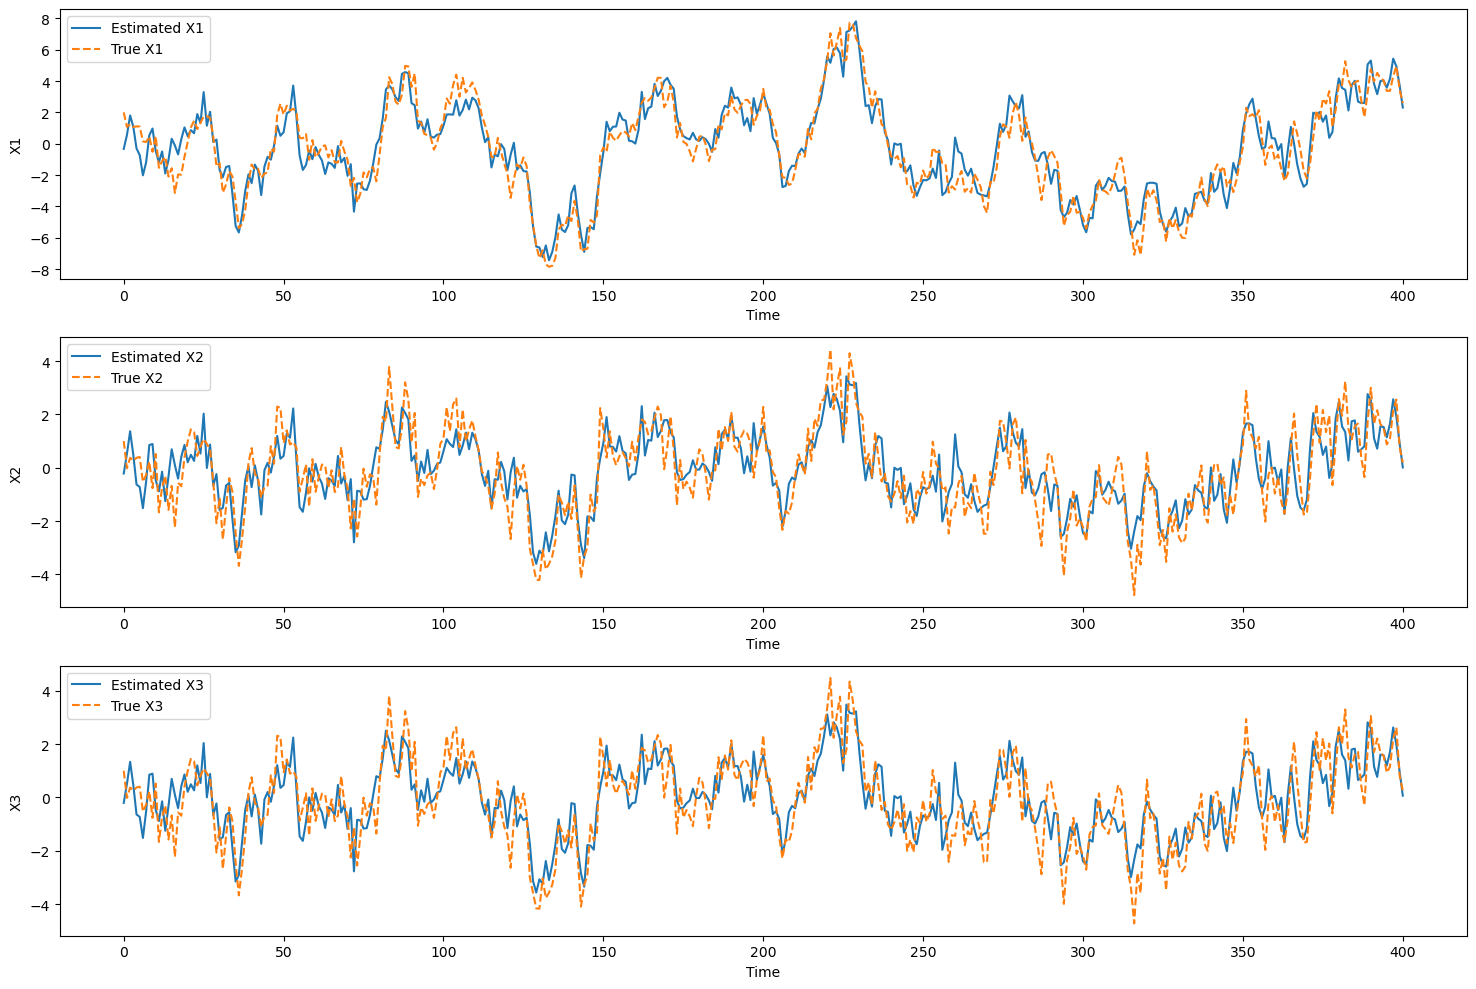

In [2]:
import numpy as np

# 주어진 매트릭스 및 변수 설정
At = np.array([[0.8500, 0.1500, 0.0500],
               [0.0500, 0.7000, 0.0000],
               [0.0500, -0.0500, 0.7500]])

Bt = np.array([[10.0000],
               [0.0000],
               [14.2103]])

Gt = np.array([[1.0],
               [1.0],
               [1.0]])

Ht = np.array([[1, 0, 0]])

Rt = 2.9862
Qt = 1.0129

# 초기 상태 및 공분산 행렬 설정
x_hat = np.zeros((3, 1))  # 초기 상태 추정
P = np.eye(3) * 1.0  # 초기 공분산 행렬

# 데이터 로드
u = np.loadtxt('input_u.txt')  # 입력 데이터
y = np.loadtxt('output_y.txt')  # 출력 데이터

# 결과 저장 리스트
x_estimates = []

# 칼만 필터 반복
for k in range(len(u)):
    # 예측 단계
    x_hat = At @ x_hat + Bt * u[k]
    P = At @ P @ At.T + Gt @ Gt.T * Qt
    
    # 업데이트 단계
    K = P @ Ht.T @ np.linalg.inv(Ht @ P @ Ht.T + Rt)
    x_hat = x_hat + K @ (y[k] - Ht @ x_hat)
    P = (np.eye(3) - K @ Ht) @ P
    
    # 추정 결과 저장
    x_estimates.append(x_hat.flatten())

# 추정 결과를 numpy 배열로 변환
x_estimates = np.array(x_estimates)

# 결과 출력
print("Estimated States:\n", x_estimates)

# 비교 데이터 로드
X1 = np.loadtxt('X1.txt')
X2 = np.loadtxt('X2.txt')
X3 = np.loadtxt('X3.txt')

# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x_estimates[:, 0], label='Estimated X1')
plt.plot(X1, label='True X1', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('X1')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x_estimates[:, 1], label='Estimated X2')
plt.plot(X2, label='True X2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('X2')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x_estimates[:, 2], label='Estimated X3')
plt.plot(X3, label='True X3', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('X3')
plt.legend()

plt.tight_layout()
plt.show()


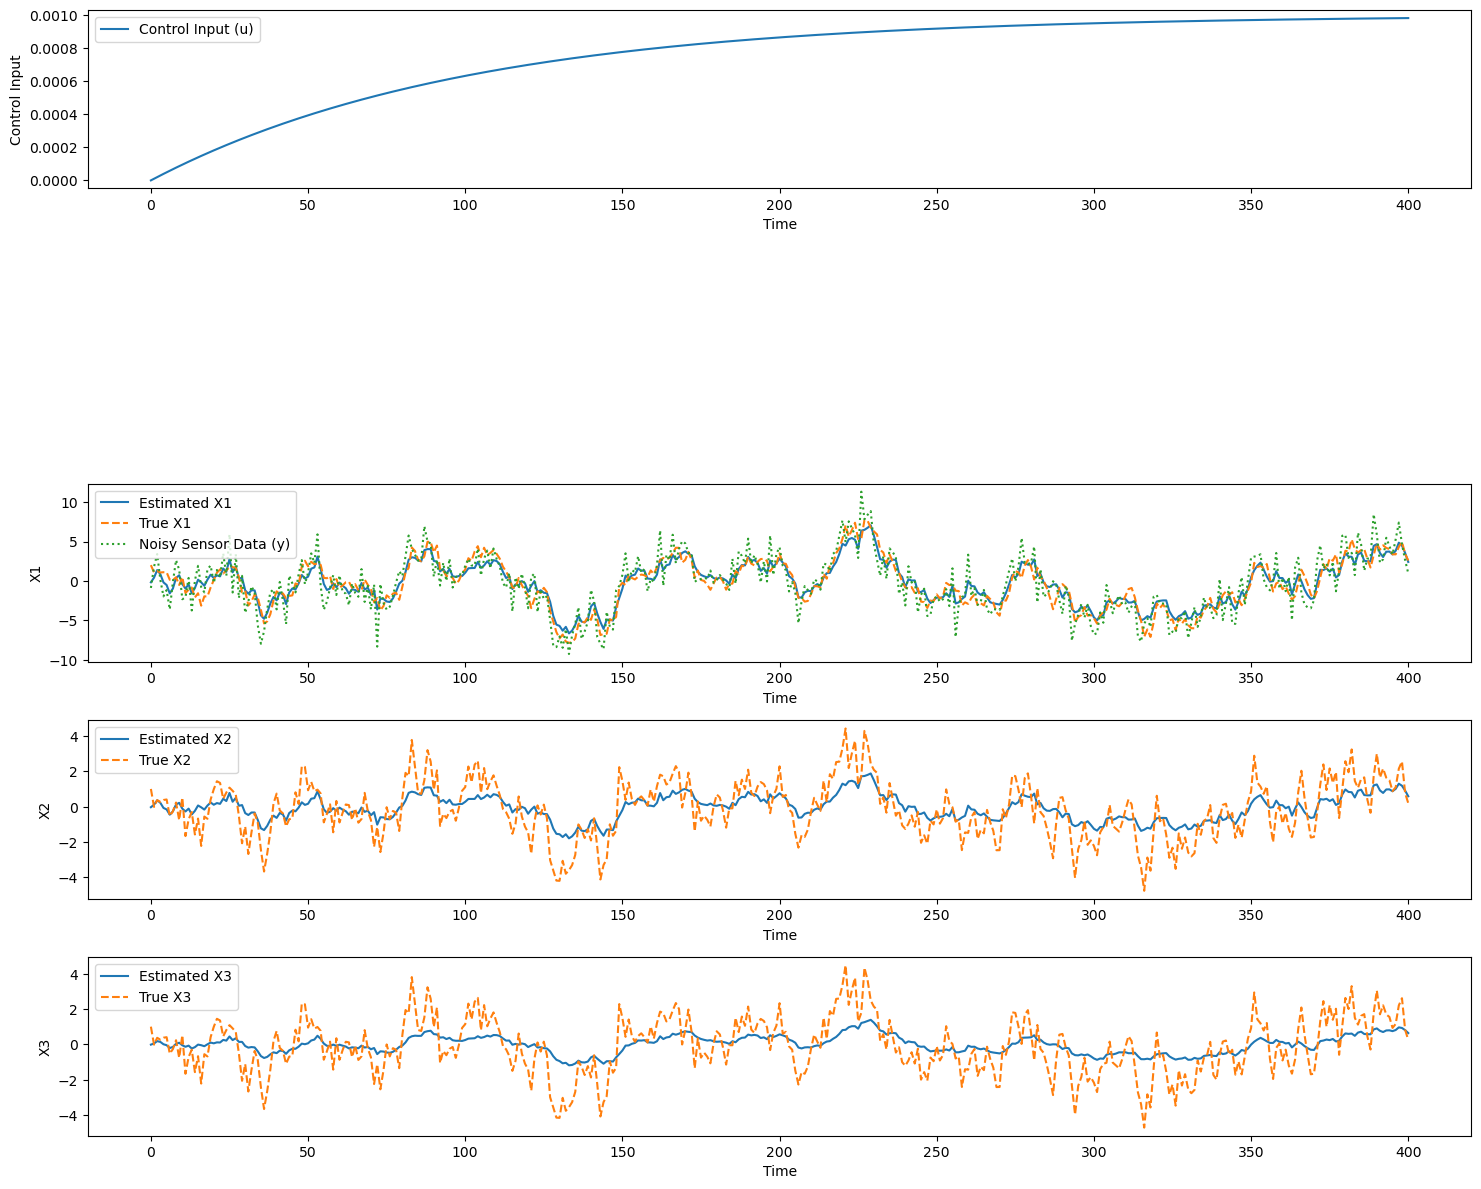

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints

# 주어진 매트릭스 및 변수 설정
At = np.array([[0.8500, 0.1500, 0.0500],
               [0.0500, 0.7000, 0.0000],
               [0.0500, -0.0500, 0.7500]])

Bt = np.array([[10.0000],
               [0.0000],
               [14.2103]])

Ht = np.array([[1, 0, 0]])

Rt = 2.9862
Qt = 1.0129

# 시스템 함수 정의
def fx(state, dt, u):
    return At @ state + Bt.flatten() * u

# 측정 함수 정의
def hx(state):
    return Ht @ state

# 초기 상태 및 공분산 행렬 정의
initial_state = np.array([0, 0, 0])
P = np.eye(3) * 1.0

# 시그마 포인트 및 UKF 인스턴스 생성
points = MerweScaledSigmaPoints(n=3, alpha=0.1, beta=2., kappa=-1)
ukf = UKF(dim_x=3, dim_z=1, dt=0.1, fx=fx, hx=hx, points=points)
ukf.x = initial_state
ukf.P = P
ukf.R = np.array([[Rt]])
ukf.Q = np.eye(3) * Qt

# 데이터 로드
u = np.loadtxt('input_u.txt')  # 제어 입력 데이터
y = np.loadtxt('output_y.txt')  # 센서 측정 데이터

# 결과 저장 리스트
estimated_states = []

# UKF를 사용한 상태 추정
for k in range(len(u)):
    ukf.predict(u=u[k])  # 상태 예측
    ukf.update(y[k])  # 상태 업데이트
    estimated_states.append(ukf.x.copy())

# numpy 배열로 변환
estimated_states = np.array(estimated_states)

# 비교 데이터 로드 (참 데이터)
X1 = np.loadtxt('X1.txt')
X2 = np.loadtxt('X2.txt')
X3 = np.loadtxt('X3.txt')

# 결과 시각화
plt.figure(figsize=(15, 12))

# 제어 입력 데이터 시각화
plt.subplot(5, 1, 1)
plt.plot(u, label='Control Input (u)')
plt.xlabel('Time')
plt.ylabel('Control Input')
plt.legend()

# 상태 추정 및 참 데이터 시각화
plt.subplot(5, 1, 3)
plt.plot(estimated_states[:, 0], label='Estimated X1')
plt.plot(X1, label='True X1', linestyle='dashed')
plt.plot(y, label='Noisy Sensor Data (y)', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('X1')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(estimated_states[:, 1], label='Estimated X2')
plt.plot(X2, label='True X2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('X2')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(estimated_states[:, 2], label='Estimated X3')
plt.plot(X3, label='True X3', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('X3')
plt.legend()

plt.tight_layout()
plt.show()
